# Установка PySpark


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загрузка данных из CSV

In [10]:
data = spark.read.csv('iris2.csv', inferSchema=True, header=True)
data

DataFrame[sepal_length: double, sepal_width: double, petal_length: double, petal_width: double, variety: string]

In [11]:
data.take(5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, variety='Setosa')]

In [12]:
data.count()

150

## Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров

In [13]:
data.dtypes

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('variety', 'string')]

In [15]:
variety_types = data.dropDuplicates(['variety'])
variety_types.show()

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|
+------------+-----------+------------+-----------+----------+
|         6.3|        3.3|         6.0|        2.5| Virginica|
|         5.1|        3.5|         1.4|        0.2|    Setosa|
|         7.0|        3.2|         4.7|        1.4|Versicolor|
+------------+-----------+------------+-----------+----------+



In [16]:
data_Virginica = data.where(data['variety'] == 'Virginica')
data_Virginica.describe().show()

+-------+-----------------+------------------+------------------+------------------+---------+
|summary|     sepal_length|       sepal_width|      petal_length|       petal_width|  variety|
+-------+-----------------+------------------+------------------+------------------+---------+
|  count|               50|                50|                50|                50|       50|
|   mean|6.587999999999998|2.9739999999999998|             5.552|             2.026|     null|
| stddev|0.635879593274432|0.3224966381726375|0.5518946956639833|0.2746500556366674|     null|
|    min|              4.9|               2.2|               4.5|               1.4|Virginica|
|    max|              7.9|               3.8|               6.9|               2.5|Virginica|
+-------+-----------------+------------------+------------------+------------------+---------+



In [17]:
data_Setosa = data.where(data['variety'] == 'Setosa')
data_Setosa.describe().show()

+-------+------------------+------------------+------------------+-------------------+-------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|variety|
+-------+------------------+------------------+------------------+-------------------+-------+
|  count|                50|                50|                50|                 50|     50|
|   mean| 5.005999999999999| 3.428000000000001|1.4620000000000002| 0.2459999999999999|   null|
| stddev|0.3524896872134513|0.3790643690962886|0.1736639964801841|0.10538558938004565|   null|
|    min|               4.3|               2.3|               1.0|                0.1| Setosa|
|    max|               5.8|               4.4|               1.9|                0.6| Setosa|
+-------+------------------+------------------+------------------+-------------------+-------+



In [18]:
data_Versicolor = data.where(data['variety'] == 'Versicolor')
data_Versicolor.describe().show()

+-------+------------------+------------------+------------------+-------------------+----------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|   variety|
+-------+------------------+------------------+------------------+-------------------+----------+
|  count|                50|                50|                50|                 50|        50|
|   mean|             5.936|2.7700000000000005|              4.26| 1.3259999999999998|      null|
| stddev|0.5161711470638635|0.3137983233784114|0.4699109772399579|0.19775268000454407|      null|
|    min|               4.9|               2.0|               3.0|                1.0|Versicolor|
|    max|               7.0|               3.4|               5.1|                1.8|Versicolor|
+-------+------------------+------------------+------------------+-------------------+----------+



## Визуализируйте точечный график (plt.scatter) по каждой паре параметров

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

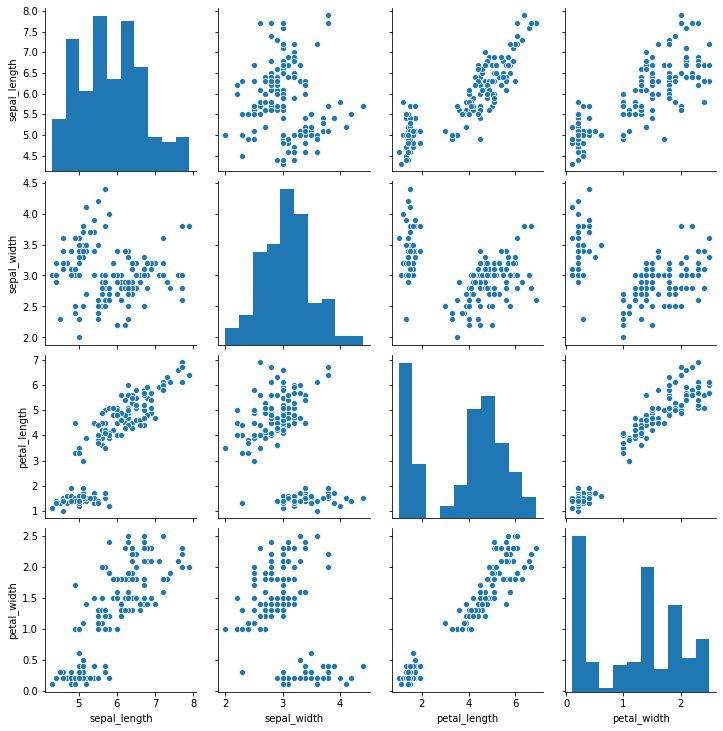

In [31]:
import seaborn as sns

dataset = data.toPandas()
g = sns.pairplot(dataset)

## Попробуйте отделить какой-нибудь тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)


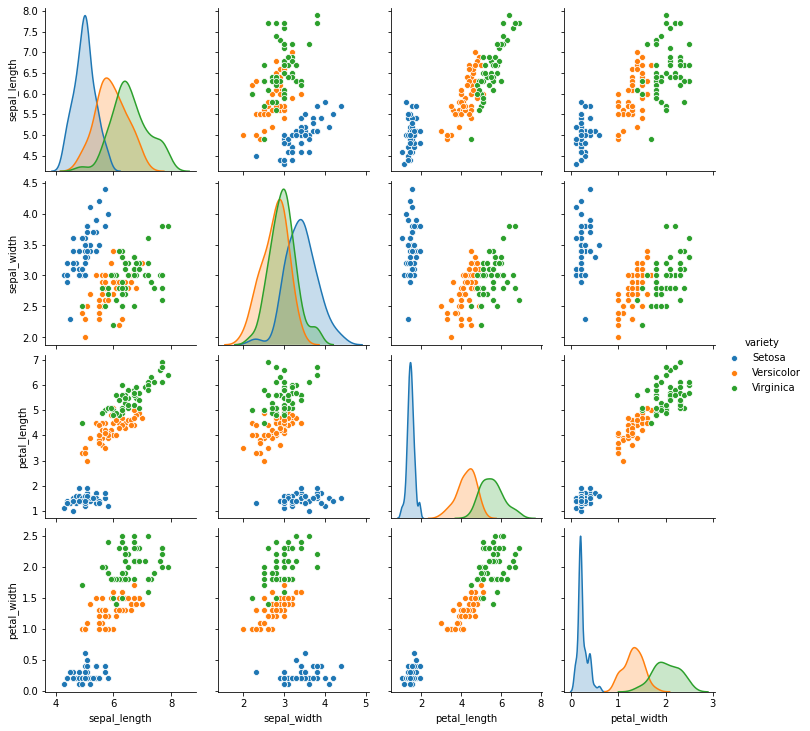

In [33]:
fig = sns.pairplot(data=dataset, hue='variety')
plt.show()

## Сделайте отдельную колонку для своего предсказания

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [40]:
datatest = data
datatest.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [45]:
def valueToCategory(value1, value2, value3, value4):
   if   (5.8 >= value1 >= 4.3) and (4.4 >= value2 >= 2.3) and (1.9 >= value3 >= 1.0) and (0.6 >= value4 >= 0.1): return 'Setosa'
   elif (7.0 >= value1 >= 4.9) and (3.4 >= value2 >= 2.0) and (5.1 >= value3 >= 3.0) and (1.8 >= value4 >= 1.0): return 'Versicolor'
   elif (7.9 >= value1 >= 4.9) and (3.8 >= value2 >= 2.2) and (6.9 >= value3 >= 4.5) and (2.5 >= value4 >= 1.4): return 'Virginica'
   else: return 'n/a'

udfValueToCategory = udf(valueToCategory, StringType())
df_with = datatest.withColumn("category", udfValueToCategory("sepal_length", "sepal_width", "petal_length","petal_width"))
df_with.show()

+------------+-----------+------------+-----------+-------+--------+
|sepal_length|sepal_width|petal_length|petal_width|variety|category|
+------------+-----------+------------+-----------+-------+--------+
|         5.1|        3.5|         1.4|        0.2| Setosa|  Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|  Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|  Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|  Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|  Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|  Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|  Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|  Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|  Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|  Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|  Setosa|
|         4.8|        3.4|        

## Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [46]:
def quality(value1, value2):
   if   value1 == value2 : return 1
   elif value1 != value2: return 0
   else: return 'n/a'

udfQuality = udf(quality, IntegerType())
datatest_with = df_with.withColumn("quality", udfQuality("variety", "category"))
datatest_with.show()

+------------+-----------+------------+-----------+-------+--------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|category|quality|
+------------+-----------+------------+-----------+-------+--------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|  Setosa|      1|
|         4.9|        3.0|         1.4|        0.2| Setosa|  Setosa|      1|
|         4.7|        3.2|         1.3|        0.2| Setosa|  Setosa|      1|
|         4.6|        3.1|         1.5|        0.2| Setosa|  Setosa|      1|
|         5.0|        3.6|         1.4|        0.2| Setosa|  Setosa|      1|
|         5.4|        3.9|         1.7|        0.4| Setosa|  Setosa|      1|
|         4.6|        3.4|         1.4|        0.3| Setosa|  Setosa|      1|
|         5.0|        3.4|         1.5|        0.2| Setosa|  Setosa|      1|
|         4.4|        2.9|         1.4|        0.2| Setosa|  Setosa|      1|
|         4.9|        3.1|         1.5|        0.1| Setosa|  Setosa|      1|

In [48]:
datatest_with.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+---------+-------------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety| category|            quality|
+-------+------------------+-------------------+------------------+------------------+---------+---------+-------------------+
|  count|               150|                150|               150|               150|      150|      150|                150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|     null| 0.9466666666666667|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|     null|0.22545008425851168|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|   Setosa|                  0|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|Virginica|     

In [0]:
# точность моей модели составляет 95%